In [1]:
import format
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model
from sklearn import neural_network
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


# Visualising Raw Sensor Data

### The data

<style>.rendered_html #datasets td, .rendered_html #datasets th {text-align: left !important;}
</style>
<table id='datasets' style='float:left!important;'>
    <tr>
        <th style='text-align:left;'>Dataset</th>
        <th style='text-align:left;'>Description</th>
    </tr>
    <tr>
        <td style='text-align:left;'>a_1</td>
        <td style='text-align:left;'>Left hand circuit (version 1)</td>
    </tr>
    <tr>
        <td style='text-align:left;'>a_2</td>
        <td style='text-align:left;'>Left hand circuit (version 2)</td>
    </tr>
    <tr>
        <td style='text-align:left;'>b_1</td>
        <td style='text-align:left;'>Right hand circuit (version 1)</td>
    </tr>
    <tr>
        <td style='text-align:left;'>left_right_curve</td>
        <td style='text-align:left;'>Left curve followed by a right curve</td>
    </tr>
    <tr>
        <td style='text-align:left;'>left_right_90_deg</td>
        <td style='text-align:left;'>90 degree left turn followed by 90 degree right turn</td>
    </tr>
</table>

In [19]:
def load_dataset(take_weighted_average):
    # Load dataset here 
    dataset = format.load("b_1") + format.load("b_2") + format.load("b_3")

    # preprocess? or use raw data?
    if take_weighted_average:
        # weighted average x,y coord
        df = format.toDataFrameWeighted(format.weightedAvg(dataset,keep_motors=True))
    else:
        # raw data
        df = format.toDataFrame(format.reduce(dataset))
    return df

### Distribution

<IPython.core.display.Javascript object>


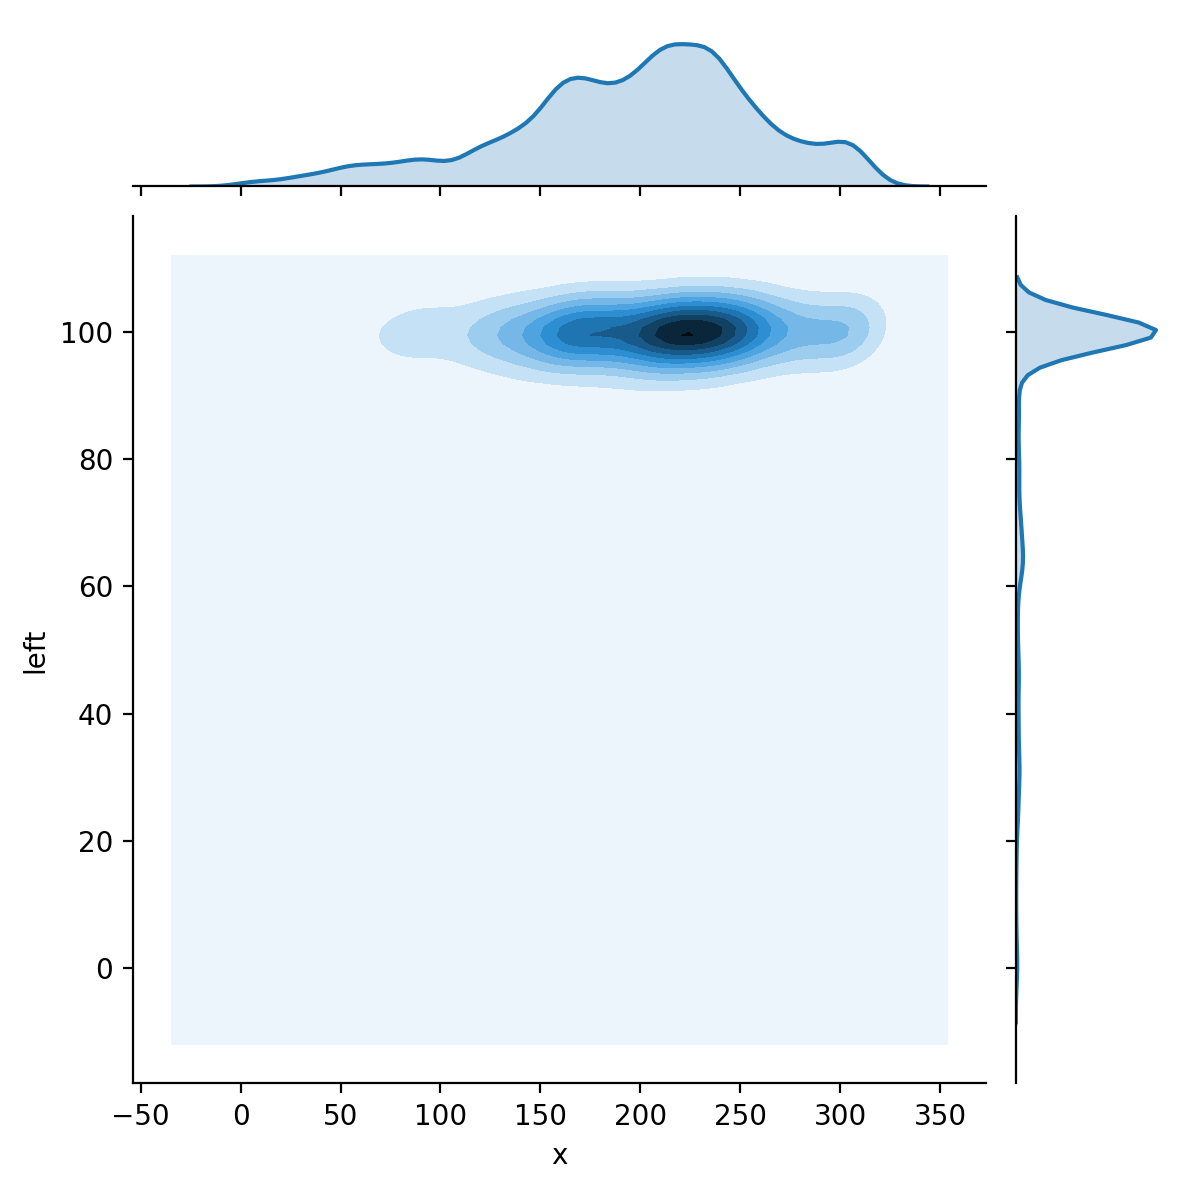

<IPython.core.display.Javascript object>


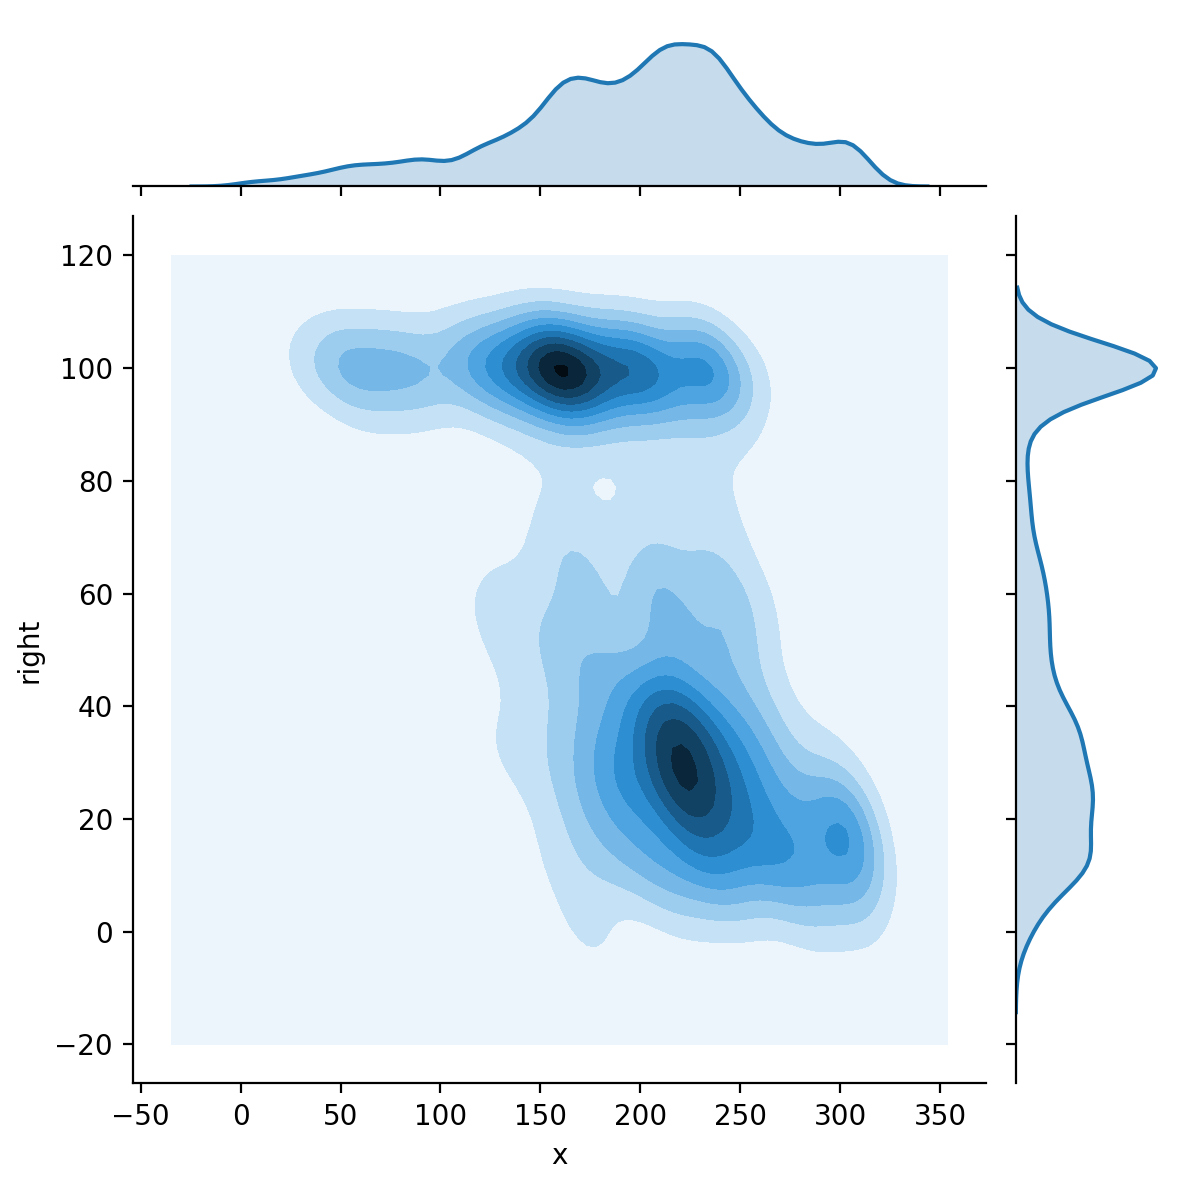

,type,sig,x,y,w,h,left,right
count,22068.0,22068.0,22068.00,22068.00,22068.00,22068.00,22068.00,22068.00
mean,0.0,1.0,196.31,128.10,109.72,111.56,90.53,53.83
std,0.0,0.0,62.87,37.01,77.30,61.02,21.13,35.21
min,0.0,1.0,1.00,1.00,2.00,2.00,-0.00,-0.00
25%,0.0,1.0,160.00,106.00,43.00,69.00,100.00,23.00
50%,0.0,1.0,205.00,130.00,93.00,118.00,100.00,44.00
75%,0.0,1.0,238.00,153.00,169.00,166.00,100.00,100.00
max,0.0,1.0,318.00,198.00,320.00,199.00,100.00,100.00


In [20]:
df = load_dataset(False)

plot_histogram = True
describe = True

if plot_histogram:
#     sns.jointplot(x="x", y="y", data=df, kind="kde")
    sns.jointplot(x="x", y="left", data=df, kind="kde")
    sns.jointplot(x="x", y="right", data=df, kind="kde")
#     sns.jointplot(x="y", y="left", data=df, kind="kde")
#     sns.jointplot(x="y", y="right", data=df, kind="kde")
    
if describe:
    display(df.describe().round(2))

# Outlier Detection

<IPython.core.display.Javascript object>


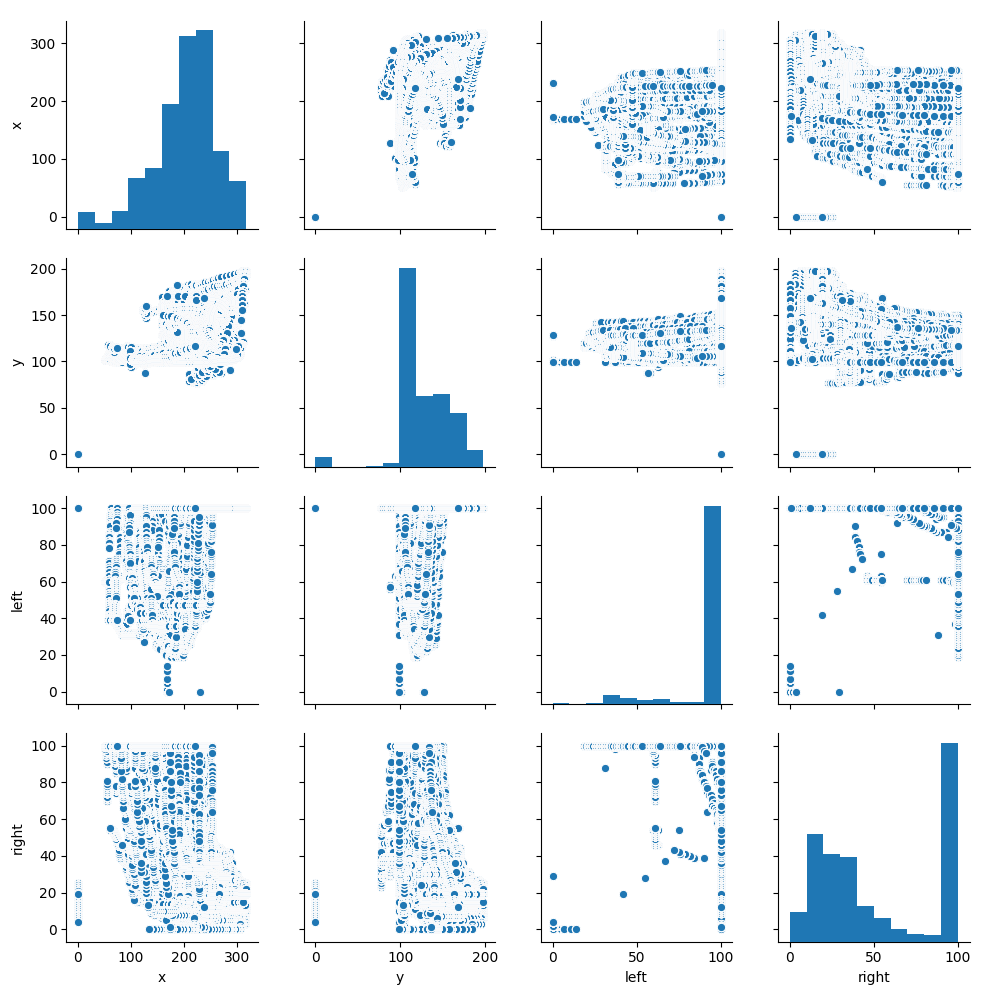

In [28]:
df = load_dataset(True)

sns.pairplot(df.loc[:,['x','y','left','right']])

### Plot Feature against Response variables

<IPython.core.display.Javascript object>


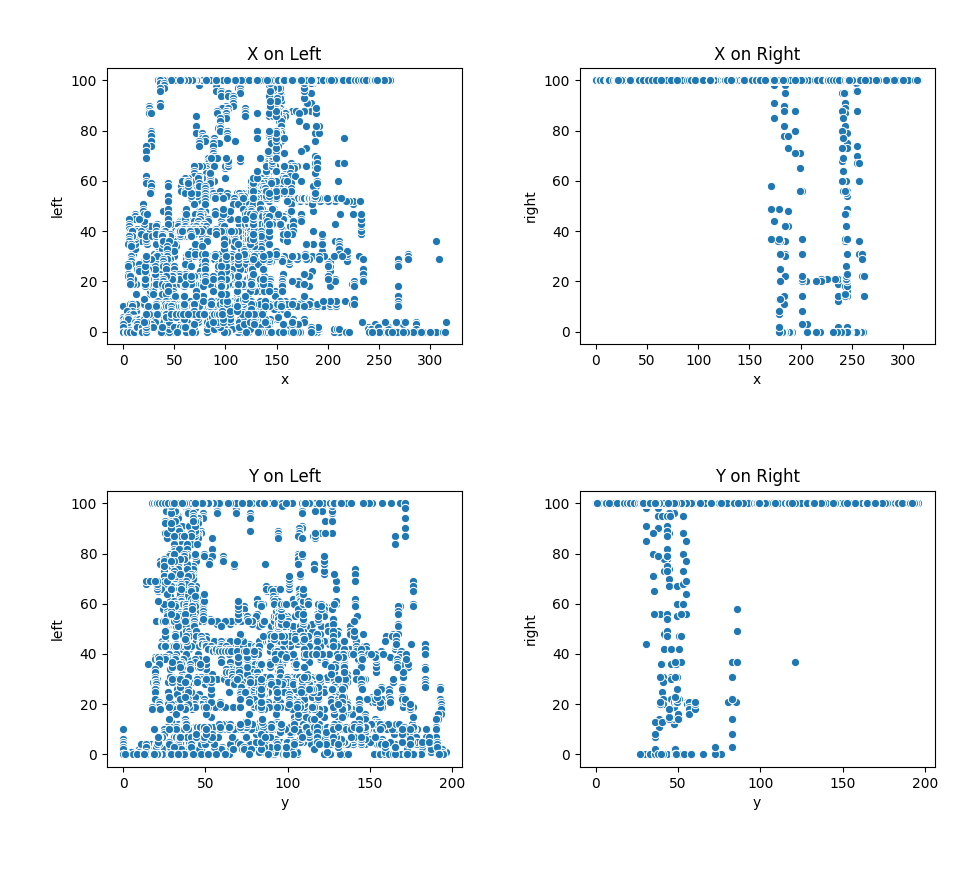

In [36]:
df = load_dataset(True)

plt.figure()

ax = plt.subplot(2,2,1,title="X on Left")
sns.scatterplot(df.x,df.left)

ax = plt.subplot(2,2,2,title="X on Right")
sns.scatterplot(df.x,df.right)

ax = plt.subplot(2,2,3,title="Y on Left")
sns.scatterplot(df.y,df.left)

ax = plt.subplot(2,2,4,title="Y on Right")
sns.scatterplot(df.y,df.right)

plt.tight_layout()
